In [1]:
import random
from pathlib import Path

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from matplotlib import cm, gridspec
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
from mpl_toolkits.axes_grid1 import AxesGrid, Grid, make_axes_locatable

In [2]:
# setup seaborn
# palette = sns.color_palette("dark")
# sns.set_theme(
#    context="paper",
#    style="ticks",
#    palette=palette,
#    color_codes=True,
# )

matplotlib.rcParams.update(
    {
        "text.usetex": True,
        "figure.autolayout": True,
        "font.family": "serif",
        "font.size": 16,
        "figure.titlesize": 16,
        "axes.titlesize": 16,
        "axes.labelsize": 16,
        "ytick.labelsize": 14,
        "xtick.labelsize": 14,
        "legend.fontsize": 16,
        "legend.title_fontsize": 16,
    }
)

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
PGT = "proportional_group_trust"
MTG = "most_trusted_group"
RANDOM = "random"

palette = sns.color_palette("dark", as_cmap=True)

In [4]:
DATA_DIR = Path(".")
plot_dir = Path("plots")
palette = sns.color_palette("Set1", 10)

In [5]:
model_df = pd.read_parquet(f"{DATA_DIR}/model_mean_1000ts.parquet").sort_index()
model_df["cooperators"] /= 10
model_df["migrators"] /= 10

idx = pd.IndexSlice

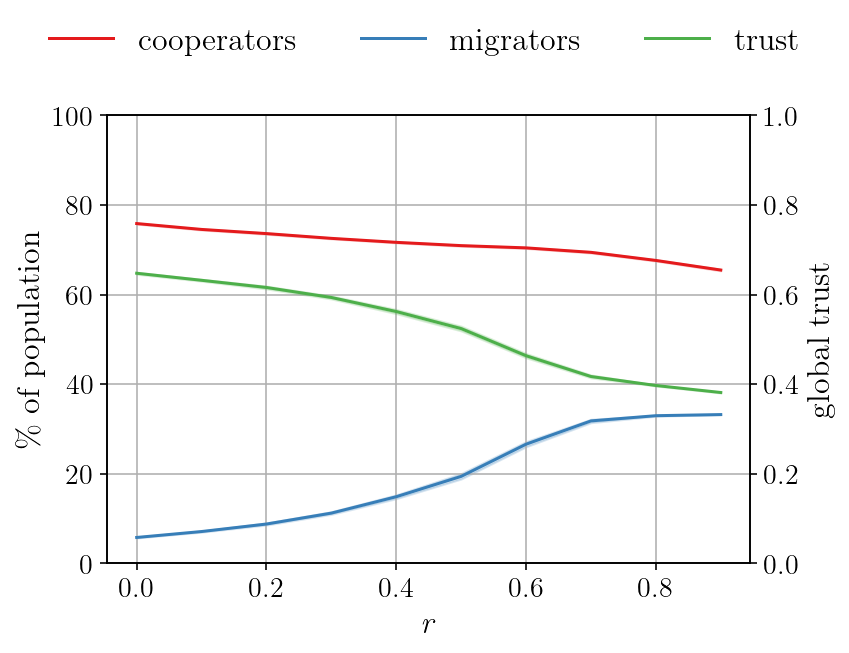

In [6]:
# cooperation/migration/trust vs. different levels of game difficulty
df = (
    model_df.loc[
        idx[PGT, :, 100, 2, 0.5, 0],
    ]
    .reset_index()
    .drop(columns=["ms", "ng", "nt", "th", "mwp"])
)

common_args = {"data": df, "x": "c", "legend": False}

ax = sns.lineplot(**common_args, y="cooperators", color=palette[0], label="cooperators")
sns.lineplot(
    **common_args,
    y="migrators",
    ax=ax,
    color=palette[1],
    label="migrators",
)
ax.set_ylim(0, 100)
ax.set_xlabel("\\textit{r}")
ax.set_ylabel("\% of population")
ax.grid(True)

trust_line = ax.twinx()
sns.lineplot(
    **common_args,
    y="trust",
    ax=trust_line,
    color=palette[2],
    label="trust",
)
trust_line.set_ylim(0, 1)
trust_line.grid(False)
trust_line.set_ylabel("global trust")

ax.figure.legend(ncol=3, bbox_to_anchor=(0.5, 1.0), loc="lower center", frameon=False)
plt.savefig(plot_dir / "cooperation-trust-migration.pdf", bbox_inches="tight")
plt.show()

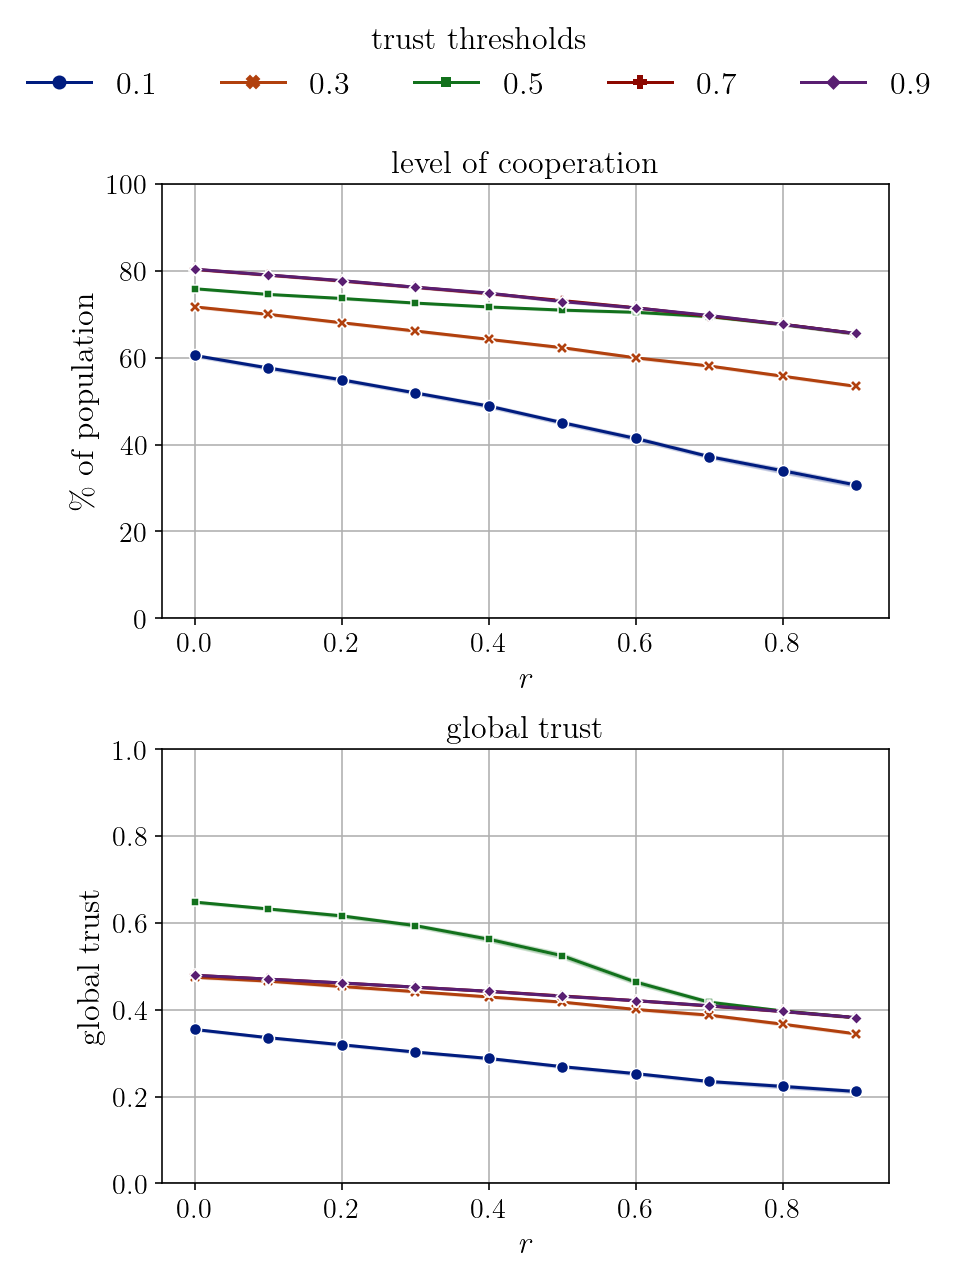

In [7]:
# impact of the trust threshold

df = (
    model_df.loc[
        idx[PGT, :, 100, 2, :, 0],
    ]
    .reset_index()
    .drop(columns=["ms", "ng", "nt"])
)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8))

plot_args = {
    "data": df,
    "x": "c",
    "hue": "th",
    "style": "th",
    "dashes": False,
    "markers": True,
    "palette": "dark",
}

sns.lineplot(
    **plot_args,
    y="cooperators",
    ax=ax1,
    legend=True,
)
ax1.grid(True)
ax1.set_ylim(0, 100)
ax1.set_xlabel("\\textit{r}")
ax1.set_ylabel("\% of population")
ax1.set_title("level of cooperation")

sns.lineplot(
    **plot_args,
    y="trust",
    ax=ax2,
    legend=False,
)
ax2.grid(True)
ax2.set_ylim(0, 1)
ax2.set_xlabel("\\textit{r}")
ax2.set_ylabel("global trust")
ax2.set_title("global trust")

handles, labels = ax1.get_legend_handles_labels()
fig.legend(
    handles, labels, title="trust thresholds", ncol=5, bbox_to_anchor=(0.5, 1), loc="lower center", frameon=False
)
ax1.get_legend().remove()

fig.tight_layout()
plt.savefig(plot_dir / "impact-of-trust-threshold.pdf", bbox_inches="tight")
plt.show()

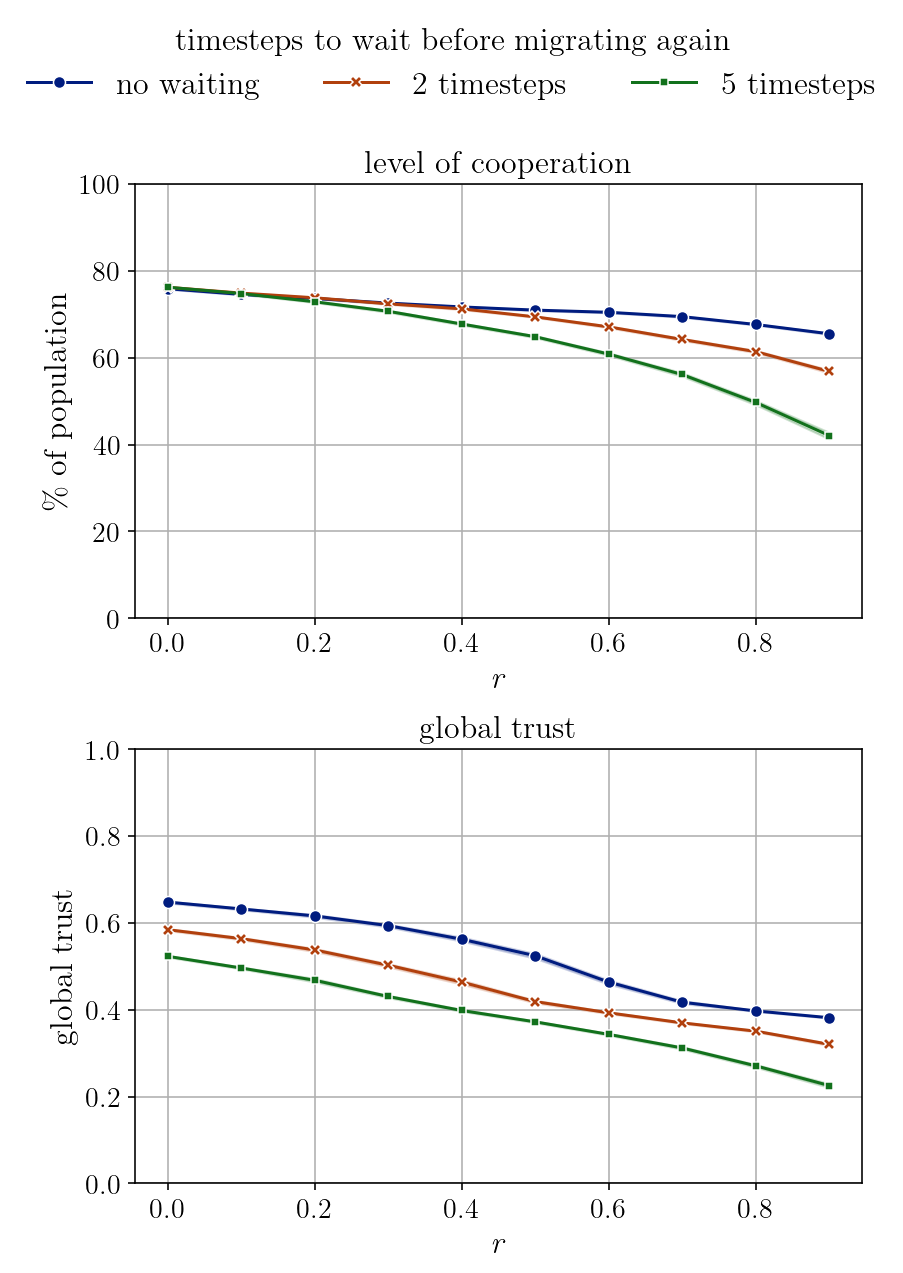

In [8]:
# impact of waiting before migrating

df = (
    model_df.loc[
        idx[PGT, :, 100, 2, 0.5, :],
    ]
    .reset_index()
    .drop(columns=["ms", "ng", "nt", "th"])
)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8))

plot_args = {
    "data": df,
    "x": "c",
    "hue": "mwp",
    "style": "mwp",
    "legend": False,
    "dashes": False,
    "markers": True,
    "palette": "dark",
}

sns.lineplot(
    **plot_args,
    y="cooperators",
    ax=ax1,
)
ax1.grid(True)
ax1.set_ylim(0, 100)
ax1.set_xlabel("\\textit{r}")
ax1.set_ylabel("\% of population")
ax1.set_title("level of cooperation")

sns.lineplot(
    **plot_args,
    y="trust",
    ax=ax2,
)
ax2.grid(True)
ax2.set_ylim(0, 1)
ax2.set_xlabel("\\textit{r}")
ax2.set_ylabel("global trust")
ax2.set_title("global trust")
#ax2.yaxis.tick_right()

handles = ax1.get_lines()
labels = ["no waiting", "2 timesteps", "5 timesteps"]
fig.legend(
    handles,
    labels,
    ncol=3,
    bbox_to_anchor=(0.5, 1),
    loc="lower center",
    frameon=False,
    title="timesteps to wait before migrating again",
)

fig.tight_layout()
plt.savefig(plot_dir / "migration-wait-periods.pdf", bbox_inches="tight")
plt.show()

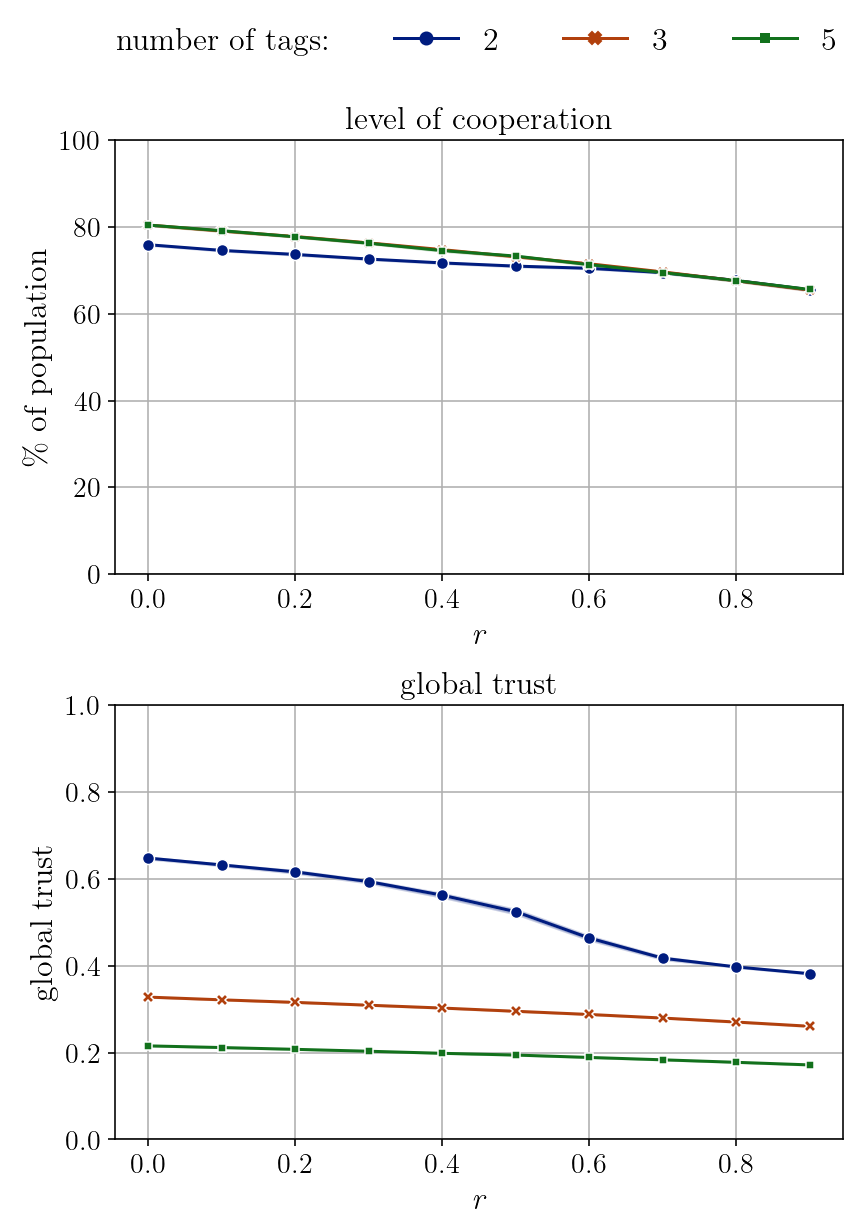

In [9]:
df = model_df.loc[
    idx[PGT, :, 100, :, 0.5, 0],
].reset_index()
df["nt"] = df["nt"].astype("uint8")

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8))

plot_args = {
    "data": df,
    "x": "c",
    "hue": "nt",
    "style": "nt",
    "dashes": False,
    "markers": True,
    "palette": "dark",
}

sns.lineplot(
    **plot_args,
    y="cooperators",
    ax=ax1,
    legend=True,
)
ax1.grid(True)
ax1.set_ylim(0, 100)
ax1.set_xlabel("\\textit{r}")
ax1.set_ylabel("\% of population")
ax1.set_title("level of cooperation")

sns.lineplot(
    **plot_args,
    y="trust",
    ax=ax2,
    legend=False,
)
ax2.grid(True)
ax2.set_ylim(0, 1)
ax2.set_xlabel("\\textit{r}")
ax2.set_ylabel("global trust")
ax2.set_title("global trust")

handles, labels = ax1.get_legend_handles_labels()
handles = [plt.plot([], marker="", ls="")[0]] + handles
labels = ["number of tags: "] + labels
fig.legend(
    handles, labels, ncol=4, bbox_to_anchor=(0.5, 1), loc="lower center", frameon=False
)
ax1.get_legend().remove()

fig.tight_layout()
plt.savefig(plot_dir / "impact-of-number-of-tags.pdf", bbox_inches="tight")
plt.show()

In [10]:
tags_df = pd.read_parquet("tags_mean_1000ts.parquet")

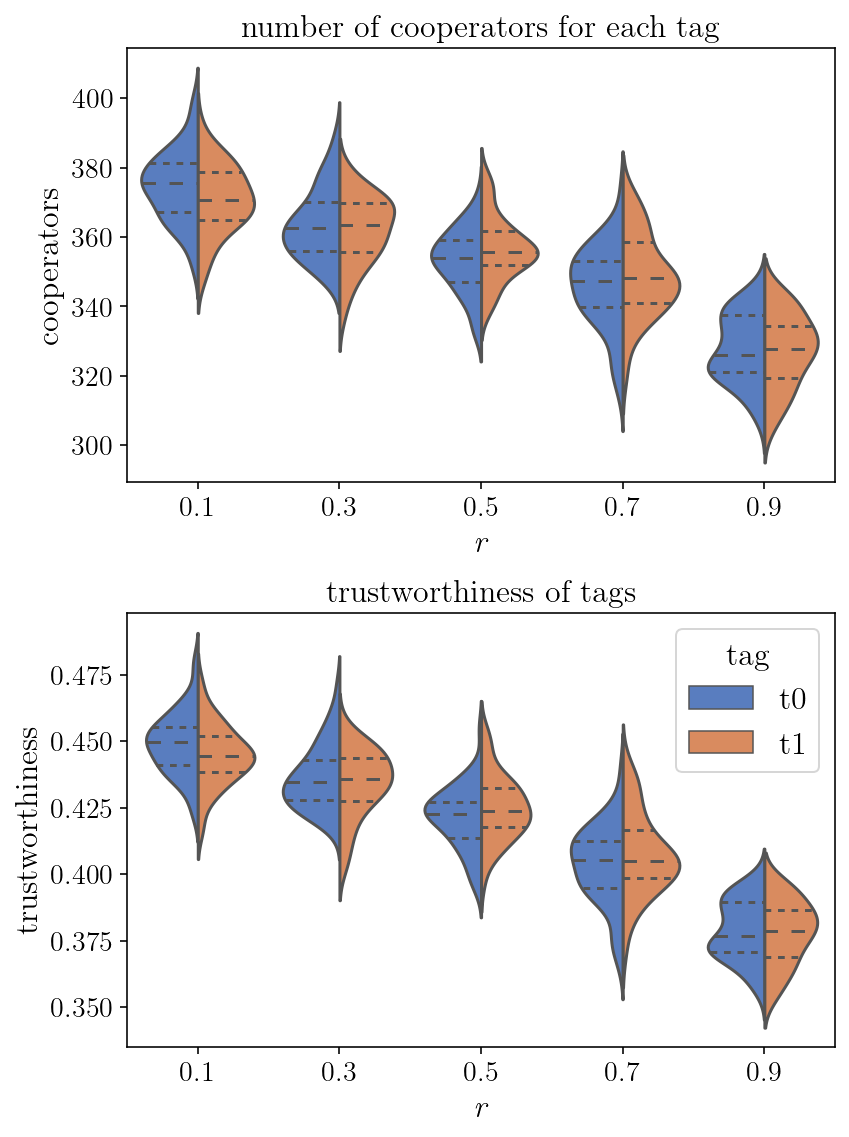

In [11]:
# how different tags have different levels of trustworthines and cooperation

df = tags_df.loc[idx[PGT, [0.1, 0.3, 0.5, 0.7, 0.9], 100, 2, 0.5, 0]].reset_index()

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(6, 8))
sns.violinplot(
    x="c",
    y="cooperators",
    hue="tag",
    data=df,
    palette="muted",
    split=True,
    ax=ax1,
    inner="quartile",
)
ax1.set_xlabel("\\textit{r}")
ax1.set_title("number of cooperators for each tag")
ax1.get_legend().remove()

sns.violinplot(
    x="c",
    y="trustworthiness",
    hue="tag",
    data=df,
    palette="muted",
    split=True,
    ax=ax2,
    inner="quartile",
)
ax2.set_xlabel("\\textit{r}")
ax2.set_title("trustworthiness of tags")

fig.tight_layout()
plt.savefig(plot_dir / "cooperation-trust-for-2-tags.pdf", bbox_inches="tight")
plt.show()

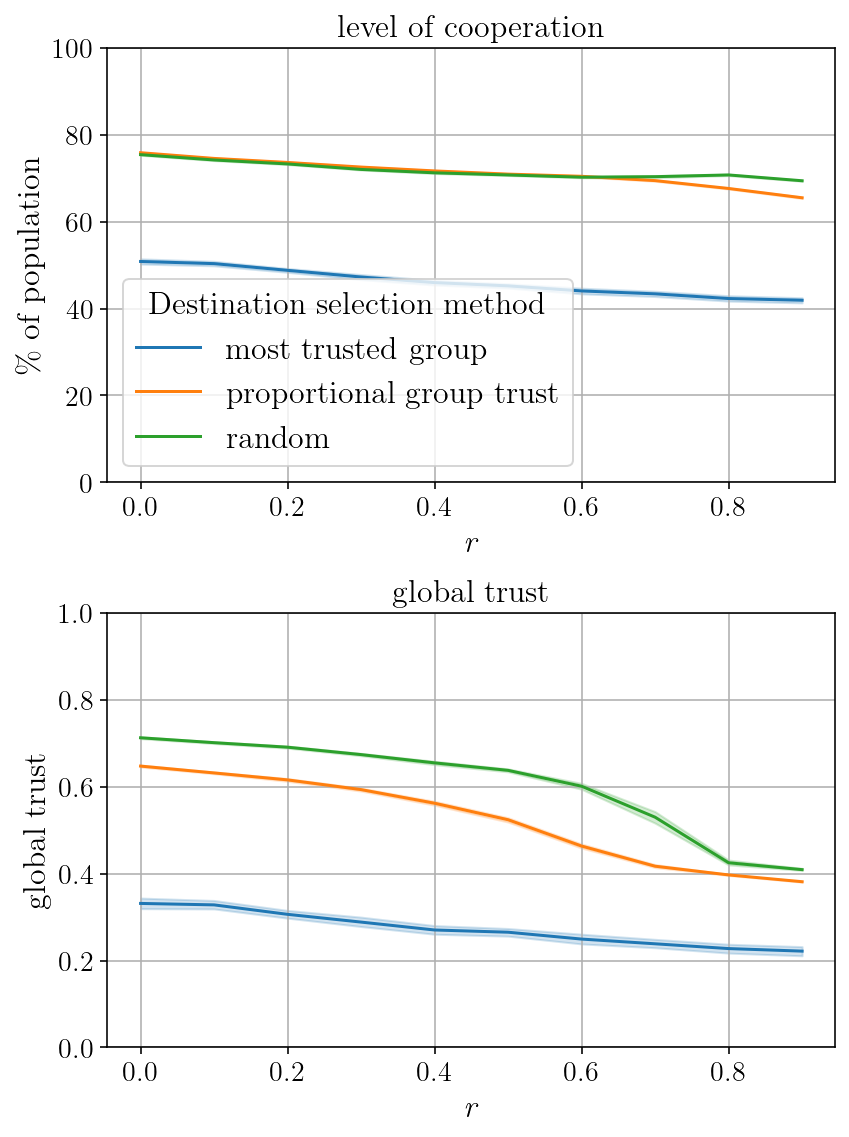

In [13]:
df = model_df.loc[idx[:, :, 100, 2, 0.5, 0]].reset_index()
df = df.replace(
    {
        "ms": {
            "most_trusted_group": "most trusted group",
            "proportional_group_trust": "proportional group trust",
        }
    }
)

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(6, 8))
sns.lineplot(data=df, x="c", y="cooperators", hue="ms", ax=ax1)
ax1.grid(True)
ax1.set_ylim(0, 100)
ax1.set_xlabel("\\textit{r}")
ax1.set_ylabel("\% of population")
ax1.set_title("level of cooperation")

sns.lineplot(data=df, x="c", y="trust", hue="ms", ax=ax2)
ax2.grid(True)
ax2.set_ylim(0, 1)
ax2.set_xlabel("\\textit{r}")
ax2.set_ylabel("global trust")
ax2.set_title("global trust")

ax2.get_legend().remove()
ax1.get_legend().set_title("Destination selection method")

fig.tight_layout()
plt.savefig(
    plot_dir / "destination-selection-methods-comparison.pdf", bbox_inches="tight"
)
plt.show()

In [14]:
# get data about tags in each group for all simulations - at the end of the simulation
tags_in_groups_df = pd.read_parquet("tags_in_groups_final_timestep.parquet")
tags_in_groups_df.loc[:, "total"] = tags_in_groups_df.sum(axis="columns")

In [25]:
def to_percent(group_sizes):
    total = group_sizes[-1]
    return [x * 100 / total for x in group_sizes[:-1]]

df = (
    tags_in_groups_df.apply(to_percent, axis="columns", result_type="expand")
    .astype("float32")
    .sort_index()
)

df = (df
      .loc[idx[:, [PGT, RANDOM], :, 10, [2, 3, 5], 0.5, 0, ], list(range(10))]
      .melt(var_name="group", value_name="percent of tag", ignore_index=False)
      .reset_index(level=["ng", "th", "mwp", "timestep"], drop=True)
      .rename(
        index={
            "proportional_group_trust": "PGT",
            "most_trusted_group": "MTG",
            "random": "RANDOM",
        })
      .sort_index()
     )

In [26]:
df.query('ms == "PGT"').reset_index()

,run,ms,c,nt,tag,group,percent of tag
0,0,PGT,0.0,2,t0,0,10.371819
1,0,PGT,0.0,2,t0,1,12.915852
2,0,PGT,0.0,2,t0,2,9.001957
3,0,PGT,0.0,2,t0,3,8.023483
4,0,PGT,0.0,2,t0,4,10.371819
...,...,...,...,...,...,...,...
49995,49,PGT,0.9,5,t4,5,11.224490
49996,49,PGT,0.9,5,t4,6,11.734694
49997,49,PGT,0.9,5,t4,7,9.693877
49998,49,PGT,0.9,5,t4,8,10.714286


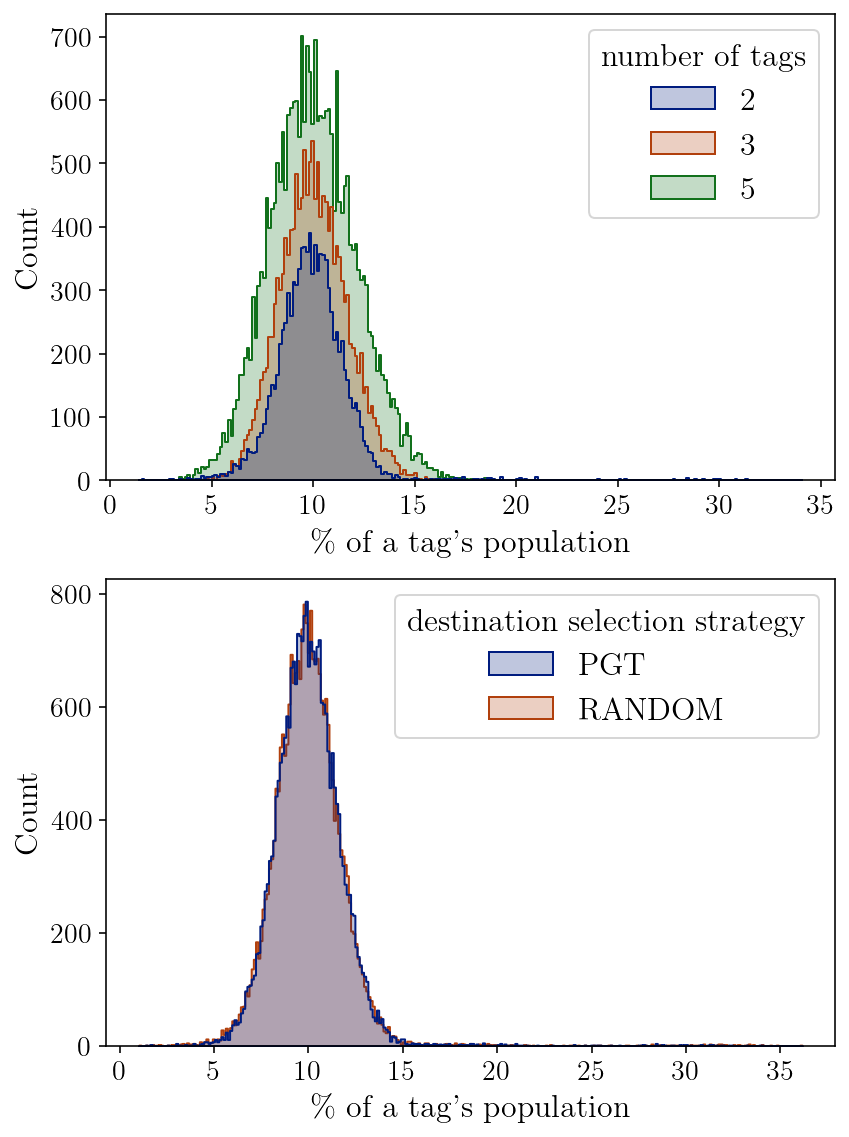

In [27]:


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8))

plot_args = {
    'x': "percent of tag",
    'multiple': "layer",
    'palette': 'dark',
    'element': 'step',
}
sns.histplot(
    data=df.query('ms == "PGT"').reset_index(),
    hue="nt",
    ax=ax1,
    **plot_args
)
ax1.get_legend().set_title("number of tags")
ax1.set_xlabel("\% of a tag's population")

sns.histplot(
    data=df.query("nt < 5").reset_index(),
    hue="ms",
    ax=ax2,
    **plot_args
)
ax2.get_legend().set_title("destination selection strategy")
ax2.set_xlabel("\% of a tag's population")

plt.savefig(plot_dir / "distribution-of-tags-in-groups.pdf", bbox_inches="tight")
plt.show()

In [16]:
mdf = pd.read_parquet("most_trusted_tags_in_groups.parquet")
mdf.loc[:, "total"] = mdf.sum(axis="columns")
mdf = (
    mdf.apply(to_percent, axis="columns", result_type="expand")
    .astype("float32")
    .sort_index()
)
mdf = mdf.reset_index().astype(
    {
        "c": "float64",
        "ng": "int64",
        "nt": "int64",
        "th": "float64",
        "mwp": "int64",
        "timestep": "int64",
    }
)
mdf = mdf.set_index(["run", "ms", "c", "ng", "nt", "th", "mwp", "tag", "timestep"])

In [28]:
df = (
    tags_in_groups_df
    .loc[idx[:, PGT, :, 10, [2, 3,5], 0.5, 2, ], [str(x) for x in list(range(10))]]
    .reset_index(level=['ng', 'ms', 'th', 'mwp', 'timestep'], drop=True)
    .stack()
    .unstack(level='tag')
    .rename_axis(index={None: 'group'})
)
df = df.apply(np.std, axis='columns').to_frame().rename(columns={0: 'stdev'}).reset_index(level=['group'], drop=False)

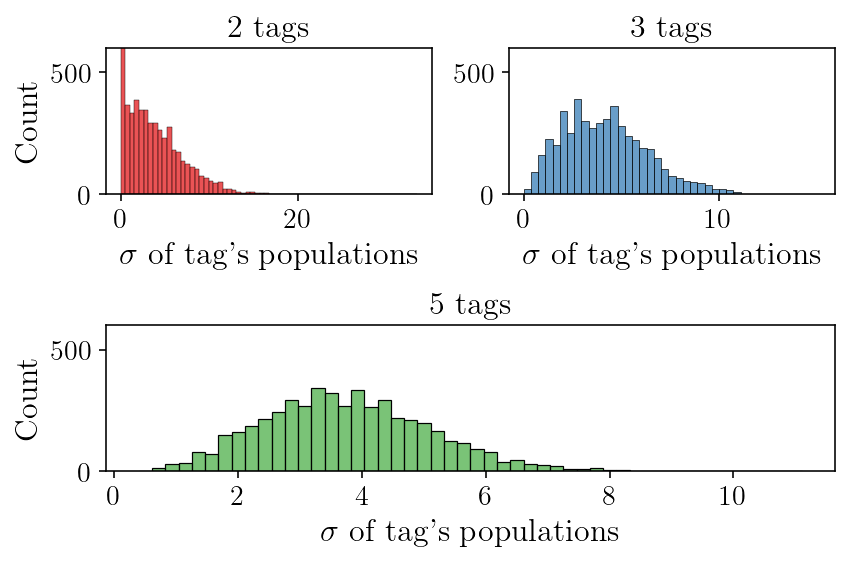

In [46]:
#fig, axes = plt.subplots(1,3, figsize=(12,4), sharey=True)

fig = plt.figure(constrained_layout=False)
gs1 = fig.add_gridspec(nrows=2, ncols=2)
ax1 = fig.add_subplot(gs1[0, 0])
ax2 = fig.add_subplot(gs1[0, 1])
ax3 = fig.add_subplot(gs1[1, :])

sns.histplot(data=df.query('nt == 2').reset_index(), x='stdev', ax=ax1, color=palette[0])
sns.histplot(data=df.query('nt == 3').reset_index(), x='stdev', ax=ax2, color=palette[1])
sns.histplot(data=df.query('nt == 5').reset_index(), x='stdev', ax=ax3, color=palette[2])

for ax,nt in zip([ax1, ax2, ax3], [2, 3, 5]):
    ax.set_title(f'{nt} tags')
    ax.set_xlabel("$\sigma$ of tag's populations")
    ax.set_ylim(0, 600)
ax2.set_ylabel("")
    
plt.savefig(plot_dir / "distribution-of-tags-within-groups.pdf", bbox_inches="tight")
plt.show()